# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [2]:
# Importing warnings for ignoring unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## Data understanding

In [3]:
# Reading the data into dataframe
bike = pd.read_csv('day.csv')

In [4]:
#checking the data and seeing the first 5 rows to see how our data looks
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of data
bike.shape

(730, 16)

In [6]:
#Checking the columns names
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#checking the info of dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

In [8]:
# Dropping the 'Instant',Casual' and 'registered' columns from data as they both are insignificant for our predictions and analyis.
#'Casual'+'registered'= 'cnt' which is our target variables.
# Instant just denoted the index which is not related to our target variable cnt an dcan be dropped as well.

bike = bike.drop(['instant','casual', 'registered'],axis =1)

In [9]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Checking for any null values

bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

We can see there are no null values in our dataset.

In [11]:
# We can see the dteday is varaible is kind of redundant as we already have information reagrding month, day ,year ,weekday/weekend 
bike = bike.drop(['dteday'],axis =1)

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Outlier Assessments



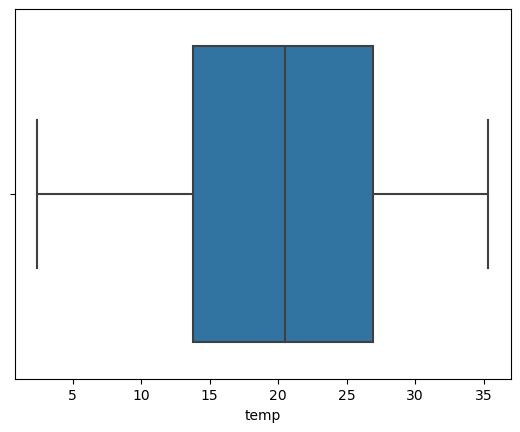

In [13]:
# checking outlier in temp columns
sns.boxplot(bike['temp'])
plt.show()

# we can see there are no outlier in temp column

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


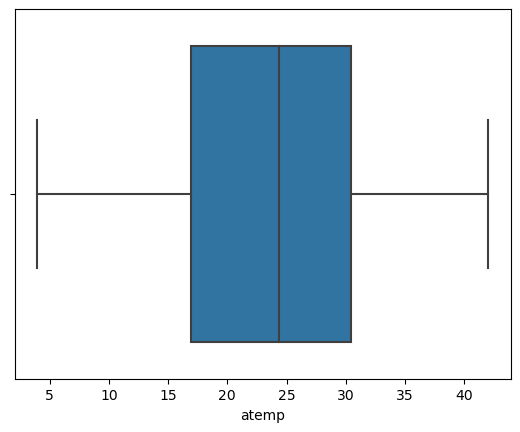

In [15]:
# checking outlier in temp columns
sns.boxplot(bike['atemp'])
plt.show()

# we can see there are no outlier in temp column

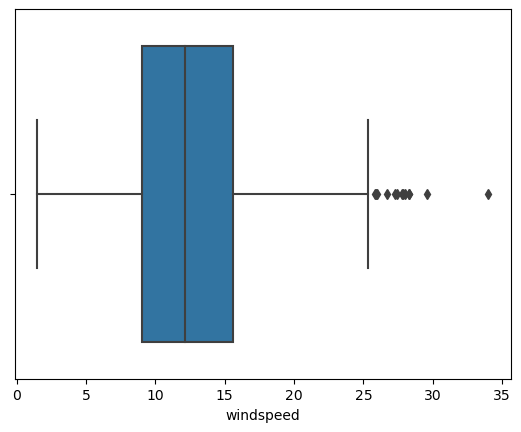

In [16]:
# checking outlier in temp columns
sns.boxplot(bike['windspeed'])
plt.show()

# we can see there are no outlier in temp column

In [17]:
# Let's check the count of outlier in windspeed.

bike.windspeed[bike['windspeed']>25].count()

17

We can see there are very less outliers in our data  hence we can keep windspeed as it is.

In [18]:
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

We can see from data Dictionary that season : season (1:spring, 2:summer, 3:fall, 4:winter),
hence it would be better if we can convert the digits in real values so that we can have some insight also will be useful for dummy variable analysis

In [19]:
bike['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)


In [20]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

## we will also replace categorical variabes mentioned below to get meaningfull interpretation:
- weathersit with {1:'good',2:'moderate',3:'bad',4:'severe'}
- mnth with {1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}
- weekday with {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}

In [21]:
bike['weathersit'].replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bike['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bike['mnth'].value_counts()

jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64

In [23]:
bike['weekday'].value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

## Exploratory Data Analysis

### Multivariate Analysis

<Figure size 1500x3000 with 0 Axes>

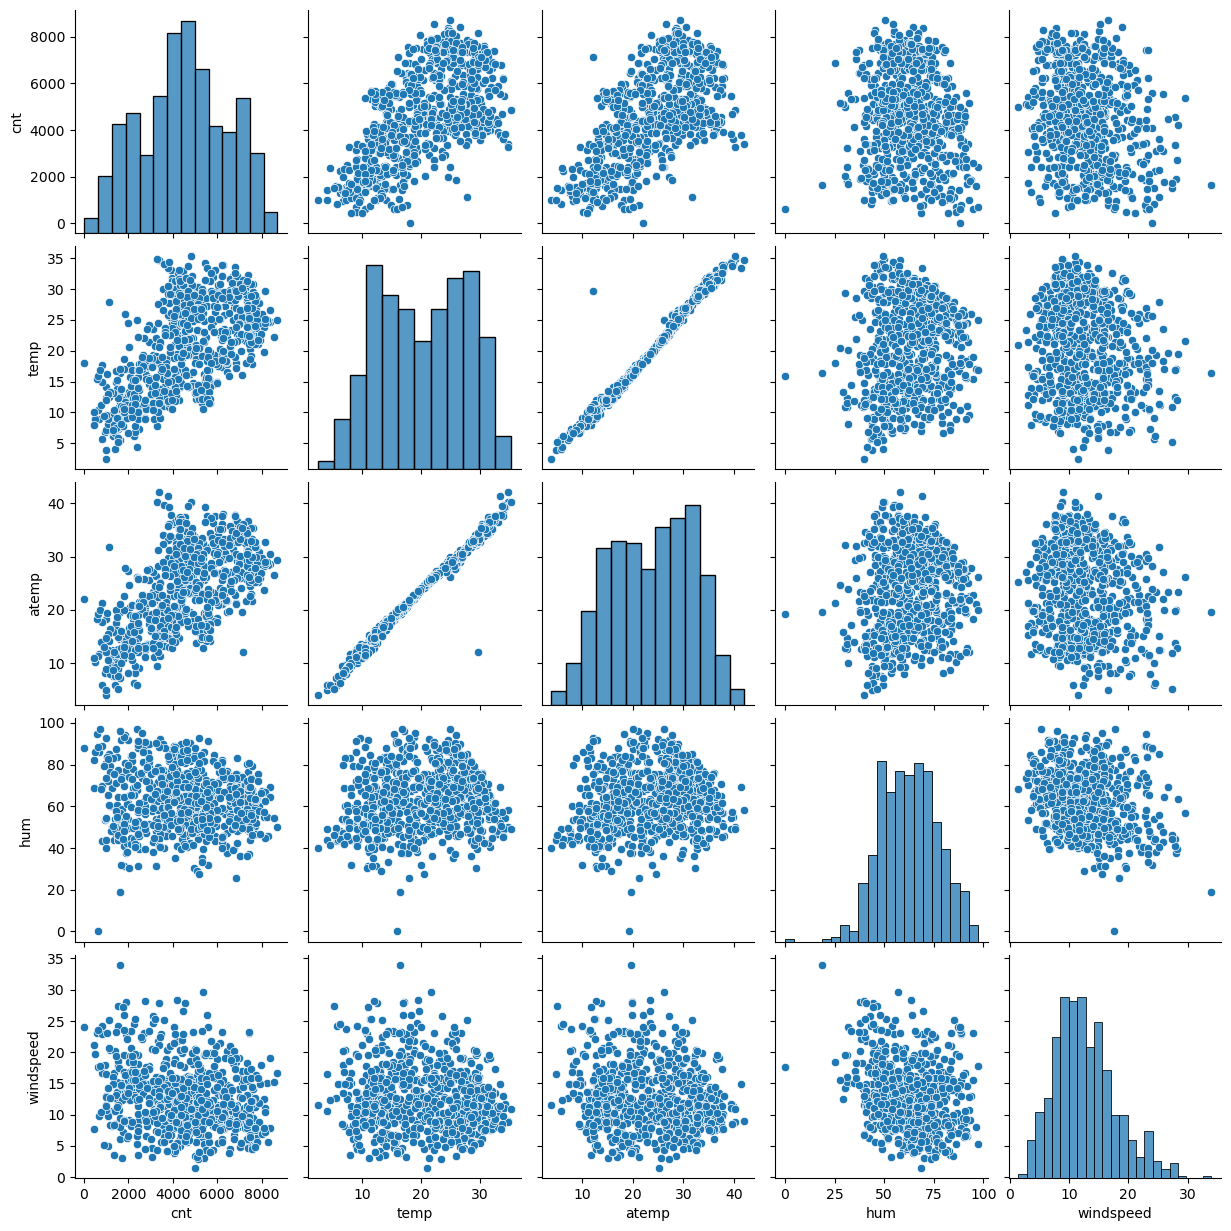

In [24]:
# Multivariate Analysis on numerical variable for finding linear relationship
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

We can there is linear relationship and high correlation between temp and atemp
Also there is somewhat linear relation between cnt and temp/atemp

## Univariate Analysis

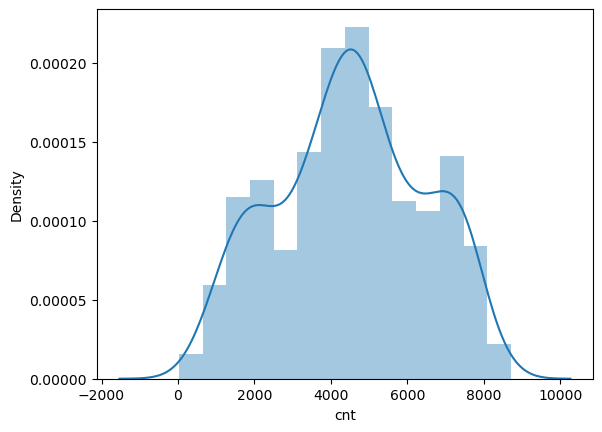

In [25]:
# let visualise the spread of cnt to see the distribution

sns.distplot(bike['cnt'])
plt.show()

We can see the distribution looks almost normal which is good for our model.

In [26]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Bivariate Analysis

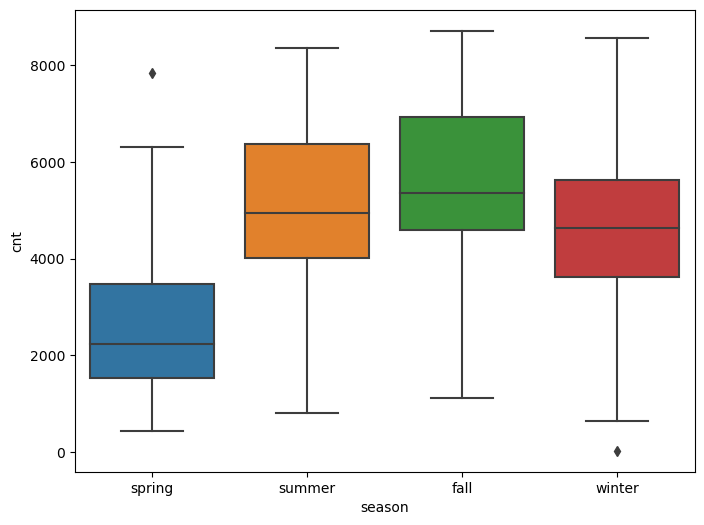

In [27]:
# let's analyse the season trend with cnt
plt.figure(figsize=(8,6))
sns.boxplot(x =bike['season'], y= bike['cnt'],data=bike)
plt.show()

 1. We can clearly see that for fall we have higher number of cnt with median(50%) around 5400 and around 75% lies between 4500 to 7000
 2. Summer has second highest number of cnt with median(50%) around 5000.
 3. Winter is third and spring is quite low as compared to all other category, this show people generally don't use shared bike much in spring season.

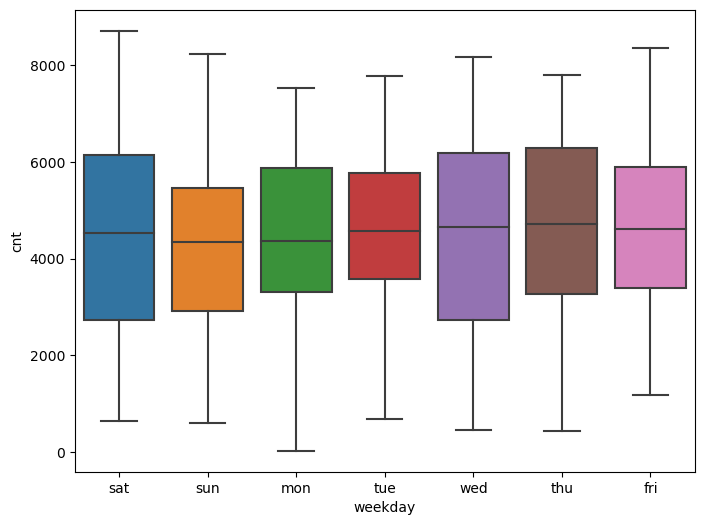

In [28]:
# let's analyse the weekday trend with cnt
plt.figure(figsize=(8,6))
sns.boxplot(x =bike['weekday'], y= bike['cnt'],data=bike)
plt.show()

1. We can see that median(50%) of people using shared bike is almost similar and around 4500.
2. We can also see that saturday and wednesday has highest number of bike sharing use approximately between 3000 to 6300.

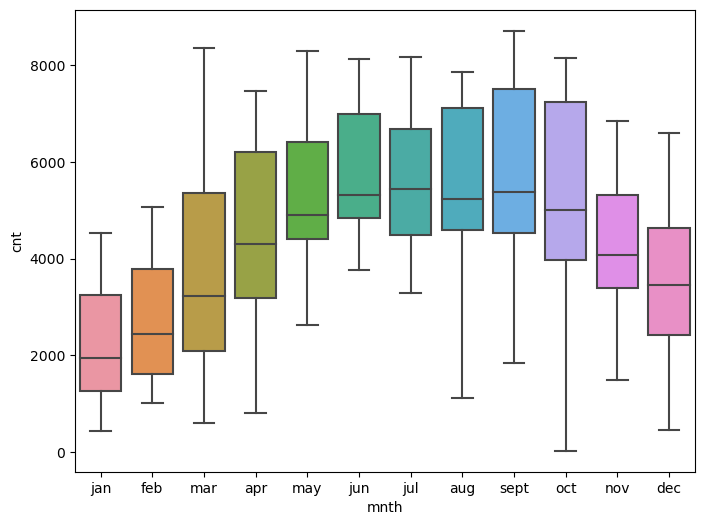

In [29]:
# let's analyse the month trend with cnt
plt.figure(figsize=(8,6))
sns.boxplot(x =bike['mnth'], y= bike['cnt'],data=bike)
plt.show()

We can see that cnt is higher for the months April, May, June , July, Aug , September, Octomber compare to other months.

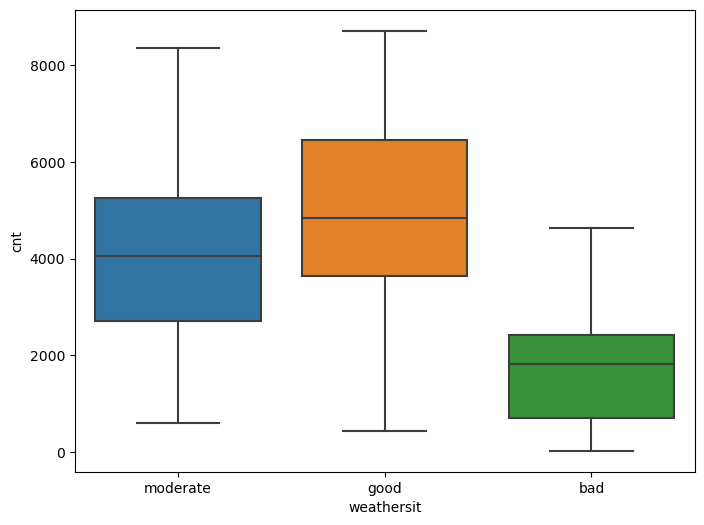

In [30]:
# let's analyse the weathersit trend with cnt
plt.figure(figsize=(8,6))
sns.boxplot(x =bike['weathersit'], y= bike['cnt'],data=bike)
plt.show()

We can observe that in good weather bike sharing is high with median around 5000 cnt, where as in moderate weather it falls
and median goes around 4000. For bad weather bike sharing cnt is quite low which is understandable.

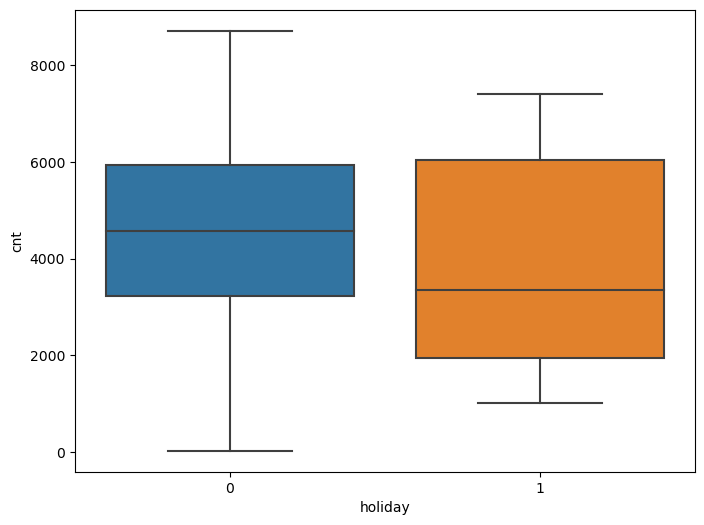

In [31]:
# let's analyse the holiday trend with cnt
plt.figure(figsize=(8,6))
sns.boxplot(x =bike['holiday'], y= bike['cnt'],data=bike)
plt.show()

We can see that that bike sharing happend mostly on non holiday days, hence holiday is not a strong predictor for bike sharing cnt.

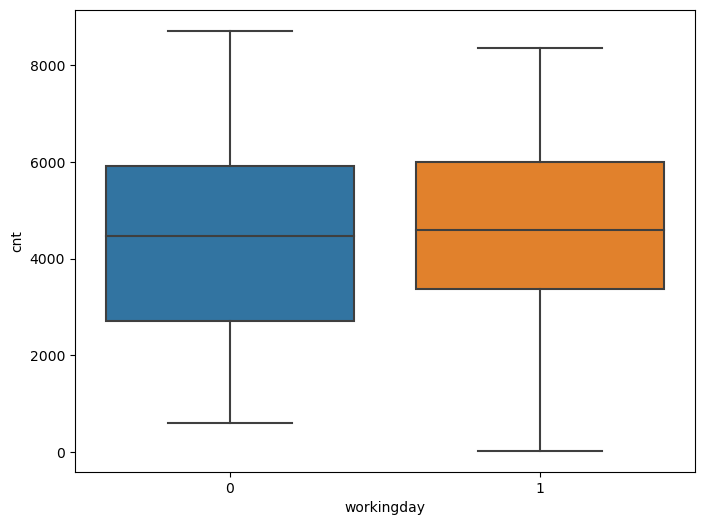

In [32]:
# let's analyse the workingday trend with cnt
plt.figure(figsize=(8,6))
sns.boxplot(x =bike['workingday'], y= bike['cnt'],data=bike)
plt.show()

We can see that on working the is data is distributed evenly and median(50%) is around 5000

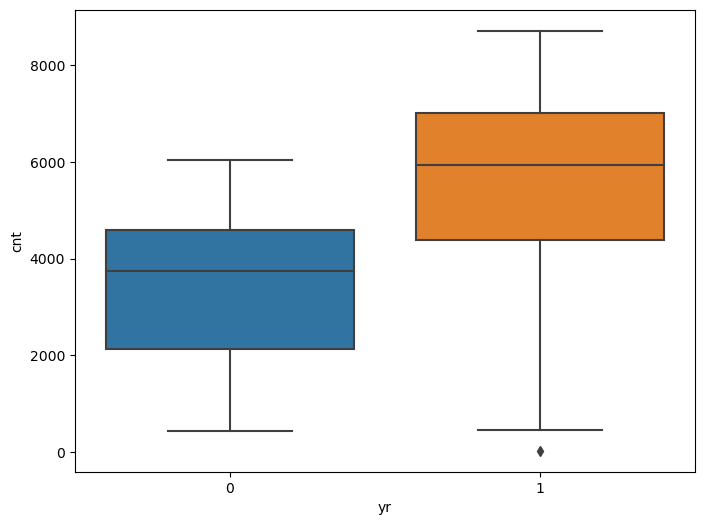

In [33]:
# let's analyse the yr trend with cnt
plt.figure(figsize=(8,6))
sns.boxplot(x =bike['yr'], y= bike['cnt'],data=bike)
plt.show()

## Checking Correlation between numerical variable


In [34]:
bike.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


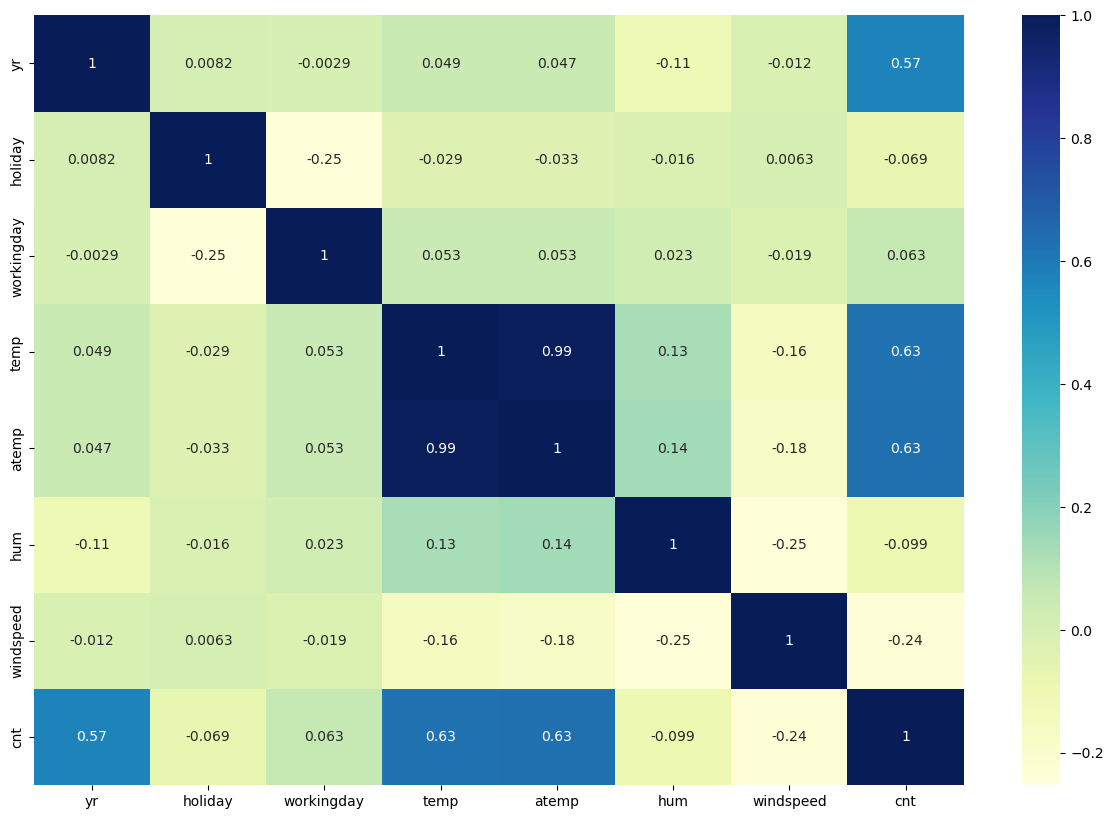

In [35]:
# Let's visualize the correlation with heatmap for better understanding
plt.figure(figsize = (15,10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see there is moderate to high correlation between cnt and yr, temp and below average negative correlation for cnt with windspeed

## Data preperation for Linear Regression model building

### Dummy Variable

#### We will be creating dummy variable for categorical variables having more than 2 category and we will leave the categorical columns with two category 1/0.

In [36]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [37]:
#'season', 'mnth','weekday','weathersit'

In [38]:
# Converting into dummy variable and dropping first columns to avoid dummy variable trap and multicollinearity between varaibles
# In weathersit there is already 1 category which is missing from data , hence we will not drop first column.
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])

In [39]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
bike.nunique()

yr                       2
holiday                  2
workingday               2
temp                   498
atemp                  689
hum                    594
windspeed              649
cnt                    695
season_spring            2
season_summer            2
season_winter            2
mnth_aug                 2
mnth_dec                 2
mnth_feb                 2
mnth_jan                 2
mnth_jul                 2
mnth_jun                 2
mnth_mar                 2
mnth_may                 2
mnth_nov                 2
mnth_oct                 2
mnth_sept                2
weekday_mon              2
weekday_sat              2
weekday_sun              2
weekday_thu              2
weekday_tue              2
weekday_wed              2
weathersit_bad           2
weathersit_good          2
weathersit_moderate      2
dtype: int64

In [41]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### Splitting the data into train_test_split 

In [42]:
# keeping training test at 70% and testing data at 30%

df_train, df_test = train_test_split(bike, train_size= 0.7, test_size=0.3, random_state=42)

In [43]:
# checking the shape of train and test dat after split
print(df_train.shape)

print(df_test.shape)

(510, 31)
(219, 31)


## Rescaling the numeric features using MinMax Scaler 

In [44]:
#Creating an instance of MinMaxscaler
scaler = MinMaxScaler()

#### Please note that apart from numeric varaibles rest of the categorical variable are in 0/1 state which is quite easy to interpret hence we will not scale it.

In [45]:
numvars = ['cnt', 'temp', 'atemp', 'hum','windspeed']

In [46]:
df_train[numvars] = scaler.fit_transform(df_train[numvars])

In [47]:
df_train[numvars]

,cnt,temp,atemp,hum,windspeed
683,0.605336,0.327133,0.322150,0.639330,0.327101
645,0.609320,0.403972,0.404998,0.731215,0.419004
163,0.554026,0.717562,0.685963,0.509660,0.708724
360,0.088253,0.331287,0.326273,0.785745,0.415925
640,0.862127,0.745598,0.682653,0.817947,0.110593
...,...,...,...,...,...
700,0.509236,0.359323,0.367719,0.848432,0.255447
71,0.239768,0.405237,0.395131,0.543468,0.621696
106,0.399976,0.495350,0.481247,0.494203,0.704080
270,0.419655,0.717562,0.651183,0.874624,0.316186


In [48]:
# checking the statistics for scaled features
df_train[numvars].describe()

,cnt,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.498206,0.551091,0.526680,0.653801,0.414566
std,0.233905,0.227401,0.213153,0.143542,0.185671
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345950,0.354176,0.352585,0.544033,0.281934
50%,0.502233,0.575824,0.564951,0.659296,0.383964
75%,0.677080,0.745338,0.698389,0.756762,0.525698
max,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that all the numeric feature has been scaled between 0 to 1 

In [49]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,0,0,1,0,0,1


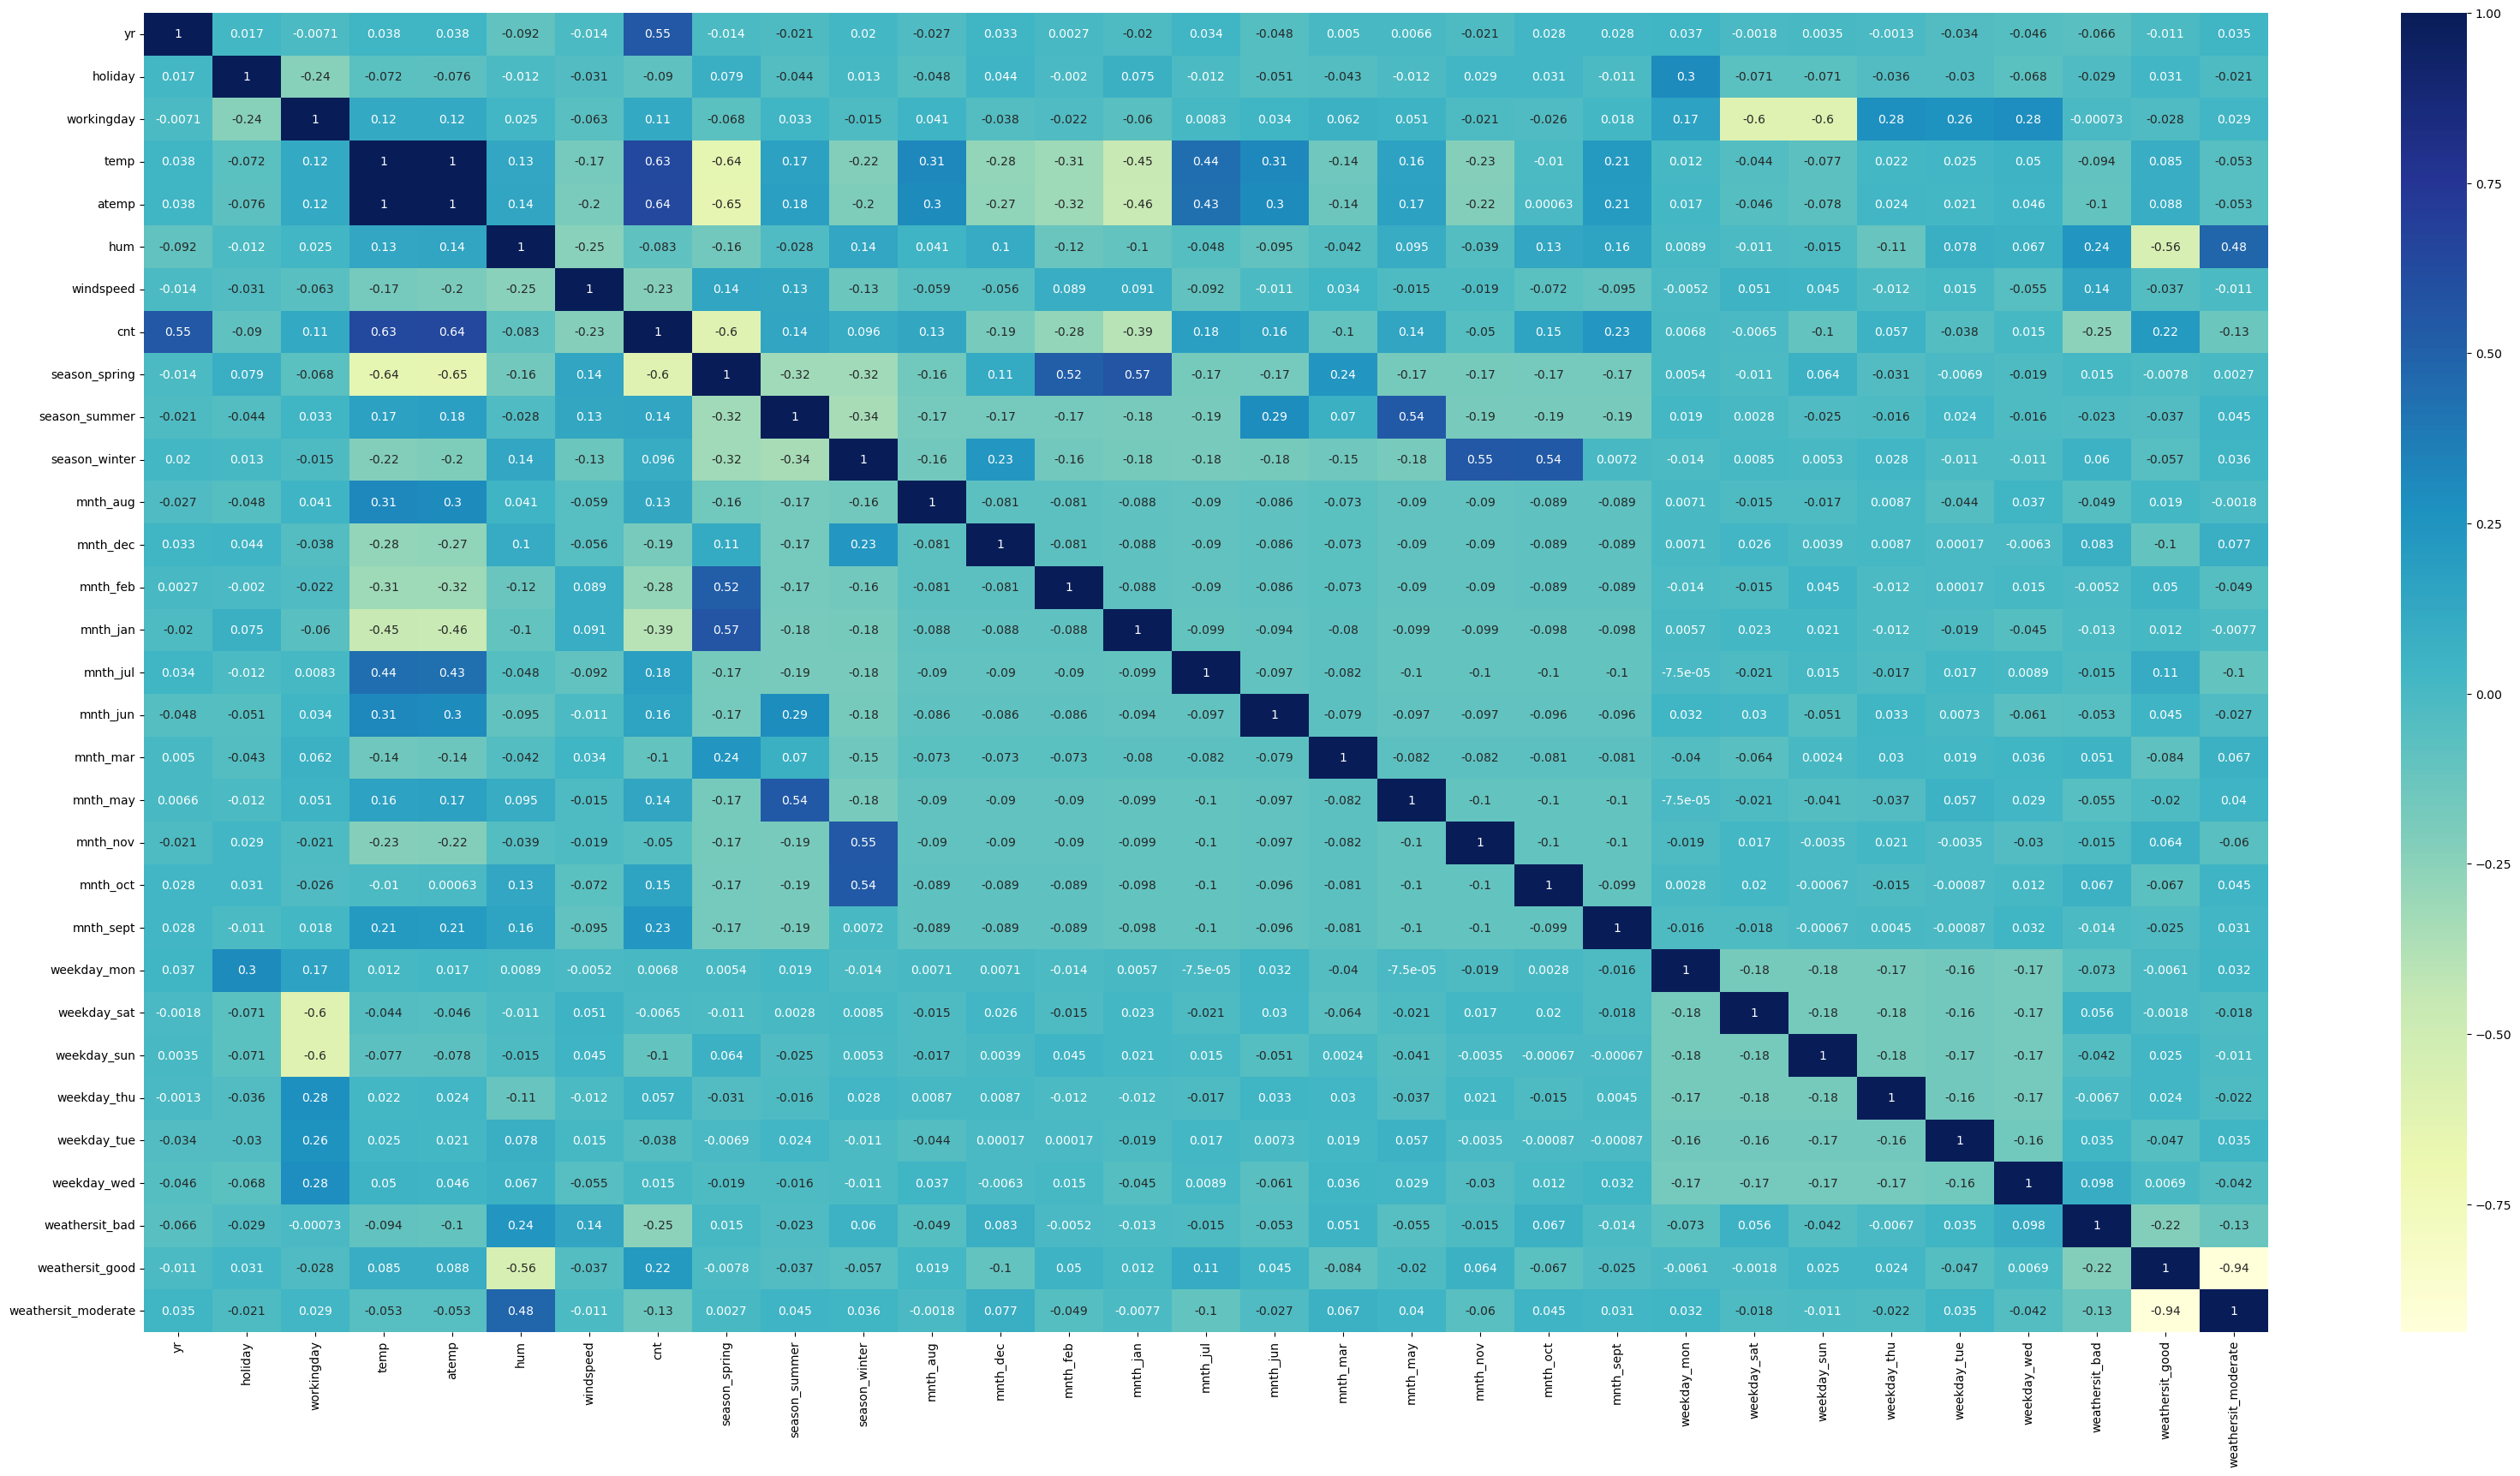

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing the model in X and y for model building

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train

In [52]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

In [53]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,1,0,0,1


## Building the Linear Regression model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [54]:
# Importing LinearRegression and RFE from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [55]:
lm = LinearRegression()

In [56]:
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# # Running RFE for automatic selection of best number of features with the output number of the variable equal to 15
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 4),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', False, 3),
 ('weekday_mon', False, 15),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [59]:
# creating columns array for rfe supported columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [60]:
# cheking the columns which are elimanted by rfe 
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [61]:
# Creating new X_train_rfe for remaining rfe features(top 15)
X_train_rfe = X_train[col]

In [62]:
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_nov,weekday_sat,weekday_sun,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.322150,0.639330,0.327101,0,1,0,1,0,0,0,0,1
645,1,1,0,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0,1
163,0,0,1,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,1,0
360,0,0,1,0.326273,0.785745,0.415925,1,0,1,0,0,0,0,0,1
640,1,0,1,0.682653,0.817947,0.110593,0,1,0,0,0,0,0,0,1


In [63]:
X_train_rfe.shape

(510, 15)

In [64]:
# Let's import VIF and statsmodels for building the model have a summary for check the r2 score and p-values and multicollineality
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Adding constant to X_train as statsmodel does not automatically provide the constant.
X_train_sm = sm.add_constant(X_train_rfe)


## Statsmodel-1 for LR

In [66]:
# fitting the first sm model

lsm1 = sm.OLS(y_train,X_train_sm).fit()

In [67]:
# checking the summary
print(lsm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.37e-183
Time:                        18:45:43   Log-Likelihood:                 473.15
No. Observations:                 510   AIC:                            -918.3
Df Residuals:                     496   BIC:                            -859.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1422    

We can see the p-values is high for weekday_sun we will remove this first

In [68]:
X_train_sm =X_train_sm.drop(['weekday_sun'], axis=1)

In [69]:
# Dropping const column before applying VIF
X_train_new =X_train_sm.drop(['const'], axis=1)

In [70]:
# let's check the vif for the variables to check multicollinearity 
vif = pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending =False)
vif

,features,VIF
12,weathersit_good,50.57
13,weathersit_moderate,34.50
11,weathersit_bad,4.50
3,atemp,3.08
6,season_spring,2.85
7,season_winter,2.17
4,hum,1.83
2,workingday,1.81
10,weekday_sat,1.70
9,mnth_nov,1.69


In [71]:
X_train_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

## Statsmodel-2 for LR

In [72]:
# Fitting the second model
lsm2 = sm.OLS(y_train,X_train_sm).fit()
# checking the summary
print(lsm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.37e-183
Time:                        18:45:43   Log-Likelihood:                 473.15
No. Observations:                 510   AIC:                            -918.3
Df Residuals:                     496   BIC:                            -859.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1592    

We can see that p-value of holiday varaible is high hence we will remove it.

In [73]:
# Dropping Holiday variable due to high value
X_train_sm =X_train_sm.drop(['holiday'], axis=1)

In [74]:
# Dropping const column before applying VIF
X_train_new =X_train_sm.drop(['const'], axis=1)

# let's check the vif for the variables to check multicollinearity 
vif = pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending =False)
vif

,features,VIF
11,weathersit_good,49.93
12,weathersit_moderate,34.17
10,weathersit_bad,4.48
2,atemp,3.08
5,season_spring,2.84
6,season_winter,2.17
3,hum,1.83
8,mnth_nov,1.69
1,workingday,1.59
9,weekday_sat,1.58


## Statsmodel-3 for LR

In [75]:
# Fitting the thrid model
lsm3 = sm.OLS(y_train,X_train_sm).fit()
# checking the summary
print(lsm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.62e-183
Time:                        18:45:43   Log-Likelihood:                 472.20
No. Observations:                 510   AIC:                            -918.4
Df Residuals:                     497   BIC:                            -863.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1549    

We can see that p-values are low for remaining variables but VIF is really high for weathersit_good, let's remove it

In [76]:
# Dropping weathersit_good variable due to high value
X_train_sm =X_train_sm.drop(['weathersit_good'], axis=1)

In [77]:
# Let's check VIF again after removing weathersit_good
# Dropping const column before applying VIF
X_train_new =X_train_sm.drop(['const'], axis=1)

# let's check the vif for the variables to check multicollinearity 
vif = pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending =False)
vif

,features,VIF
3,hum,24.33
2,atemp,15.65
4,windspeed,5.01
1,workingday,4.53
6,season_winter,2.71
5,season_spring,2.65
11,weathersit_moderate,2.23
0,yr,2.09
8,mnth_nov,1.80
9,weekday_sat,1.78


## Statsmodel-4 for LR

In [78]:
# Fitting the thrid model
lsm4 = sm.OLS(y_train,X_train_sm).fit()
# checking the summary
print(lsm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.62e-183
Time:                        18:45:43   Log-Likelihood:                 472.20
No. Observations:                 510   AIC:                            -918.4
Df Residuals:                     497   BIC:                            -863.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3032    

We can see that p- values for remaing variable are fairly low and removing the varaible did not reduce r2 score as well.

Let's now remove the 'hum' variable as it has having high VIF

In [79]:
# Dropping hum variable due to high value
X_train_sm =X_train_sm.drop(['hum'], axis=1)

# Let;s check VIF again after removing 'hum' variable
# Dropping const column before applying VIF
X_train_new =X_train_sm.drop(['const'], axis=1)

# let's check the vif for the variables to check multicollinearity 
vif = pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending =False)
vif

,features,VIF
2,atemp,6.06
3,windspeed,4.96
1,workingday,4.44
5,season_winter,2.34
0,yr,2.09
4,season_spring,1.82
7,mnth_nov,1.77
8,weekday_sat,1.75
10,weathersit_moderate,1.55
6,mnth_dec,1.31


In [80]:
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate'],
      dtype='object')

## Statsmodel-5 for LR 

In [81]:
# Fitting the thrid model
lsm5 = sm.OLS(y_train,X_train_sm).fit()
# checking the summary
print(lsm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.16e-182
Time:                        18:45:43   Log-Likelihood:                 466.73
No. Observations:                 510   AIC:                            -909.5
Df Residuals:                     498   BIC:                            -858.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2243    

We will remove windspeed even though it has second highest VIF as from buisness point of view we can say that atemp is important

In [82]:
# Dropping windspeed variable due to high value
X_train_sm =X_train_sm.drop(['windspeed'], axis=1)

# Let;s check VIF again after removing 'windspeed' variable
# Dropping const column before applying VIF
X_train_new =X_train_sm.drop(['const'], axis=1)

# let's check the vif for the variables to check multicollinearity 
vif = pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending =False)
vif

,features,VIF
2,atemp,4.74
1,workingday,4.36
4,season_winter,2.33
0,yr,2.08
6,mnth_nov,1.74
7,weekday_sat,1.70
9,weathersit_moderate,1.54
3,season_spring,1.47
5,mnth_dec,1.31
8,weathersit_bad,1.07


## Statsmodel-6 for LR

In [83]:
# Fitting the thrid model
lsm6 = sm.OLS(y_train,X_train_sm).fit()
# checking the summary
print(lsm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.66e-181
Time:                        18:45:43   Log-Likelihood:                 460.74
No. Observations:                 510   AIC:                            -899.5
Df Residuals:                     499   BIC:                            -852.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1714    

In [84]:
## Let us check the final VIF

In [85]:
# Dropping const column before applying VIF
X_train_new =X_train_sm.drop(['const'], axis=1)

# let's check the vif for the variables to check multicollinearity 
vif = pd.DataFrame()
X = X_train_new
vif['features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending =False)
vif

,features,VIF
2,atemp,4.74
1,workingday,4.36
4,season_winter,2.33
0,yr,2.08
6,mnth_nov,1.74
7,weekday_sat,1.70
9,weathersit_moderate,1.54
3,season_spring,1.47
5,mnth_dec,1.31
8,weathersit_bad,1.07


## We can see that p-values and VIF values for remaining variables are within acceptable limit and R2 score is also good at 0.824.
## Let us start working in predictions on train set and residual analysis

In [86]:
y_train_pred = lsm6.predict(X_train_sm)

## R2 score of train data

In [87]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8239629957380206

In [88]:
y_train_pred.head()

683    0.518109
645    0.601103
163    0.511155
360    0.042422
640    0.769203
dtype: float64

## Residual Analysis

<AxesSubplot:ylabel='Density'>

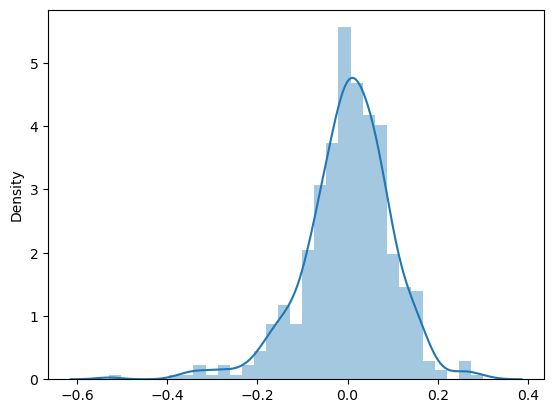

In [89]:
res = y_train - y_train_pred
sns.distplot(res)

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

# Prediction and evaluation

we need to perform feature scaling on test set as well because our model has learned the coeff for prediction on scaled features

In [90]:
numvars = ['cnt', 'temp', 'atemp', 'hum','windspeed']


In [91]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
468,1,0,0,20.295000,24.39980,50.2917,12.791439,7460,0,1,...,0,0,1,0,0,0,0,0,1,0
148,0,0,0,27.367500,30.77750,81.8750,14.333846,4788,0,1,...,0,0,0,1,0,0,0,0,1,0
302,0,0,0,13.085847,16.06645,62.3750,11.833339,3331,0,0,...,0,0,0,1,0,0,0,0,1,0
355,0,0,1,17.356653,21.30605,75.7500,3.167425,3068,1,0,...,0,0,0,0,1,0,0,0,0,1
515,1,0,1,27.880000,31.56645,49.2917,13.083693,7338,0,1,...,0,0,0,0,1,0,0,0,1,0


In [92]:
df_test[numvars] = scaler.transform(df_test[numvars])

In [93]:
df_test[numvars].head()

,cnt,temp,atemp,hum,windspeed
468,0.848606,0.543115,0.536771,0.518248,0.422104
148,0.526017,0.758058,0.704203,0.843709,0.479765
302,0.350115,0.324018,0.317998,0.642765,0.386287
355,0.318363,0.453814,0.455552,0.780592,0.062325
515,0.833877,0.773634,0.724915,0.507943,0.433030


In [94]:
df_test[numvars].describe()

,cnt,temp,atemp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479553,0.527468,0.501760,0.629546,0.435511
std,0.233091,0.229936,0.215759,0.152584,0.212750
min,-0.049378,0.047675,0.051010,0.193646,0.060760
25%,0.285826,0.324018,0.314694,0.520479,0.281156
50%,0.471206,0.507811,0.496145,0.608416,0.416900
75%,0.644151,0.726388,0.685028,0.735901,0.534288
max,0.980804,0.970925,0.939531,1.002146,1.214955


In [95]:
y_test = df_test.pop('cnt')
X_test = df_test

In [96]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 30)


In [97]:
# add constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
468,1.0,1,0,0,0.543115,0.536771,0.518248,0.422104,0,1,...,0,0,1,0,0,0,0,0,1,0
148,1.0,0,0,0,0.758058,0.704203,0.843709,0.479765,0,1,...,0,0,0,1,0,0,0,0,1,0
302,1.0,0,0,0,0.324018,0.317998,0.642765,0.386287,0,0,...,0,0,0,1,0,0,0,0,1,0
355,1.0,0,0,1,0.453814,0.455552,0.780592,0.062325,1,0,...,0,0,0,0,1,0,0,0,0,1
515,1.0,1,0,1,0.773634,0.724915,0.507943,0.433030,0,1,...,0,0,0,0,1,0,0,0,1,0


In [98]:
col = X_train_sm.columns
col

Index(['const', 'yr', 'workingday', 'atemp', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_nov', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate'],
      dtype='object')

In [99]:
# we will choose the columns which we have given at the time of training the final model
X_test_new = X_test_sm[X_train_sm.columns]

In [100]:
X_test_new.head()

,const,yr,workingday,atemp,season_spring,season_winter,mnth_dec,mnth_nov,weekday_sat,weathersit_bad,weathersit_moderate
468,1.0,1,0,0.536771,0,0,0,0,1,0,0
148,1.0,0,0,0.704203,0,0,0,0,0,0,0
302,1.0,0,0,0.317998,0,1,0,0,0,0,0
355,1.0,0,1,0.455552,1,0,1,0,0,0,1
515,1.0,1,1,0.724915,0,0,0,0,0,0,0


## Making the final predictions on test data 

In [101]:
y_pred = lsm6.predict(X_test_new)

# R2 Score for final model predictions

In [102]:
# R2 Score for final model predictions
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8079024230310464

In [103]:
r2 =round(r2_score(y_test, y_pred),3)
r2

0.808

Text(0, 0.5, 'y_pred')

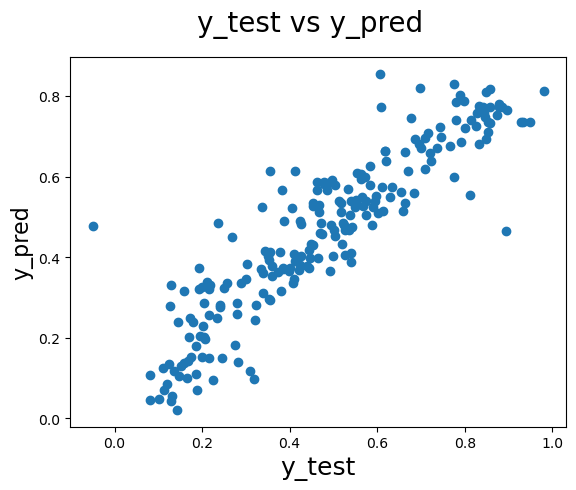

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [105]:
# Get the number of samples and predictors
n = X_test_new.shape[0]  # Number of data points
p = X_test_new.shape[1]  # Number of predictors

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adjusted_r2}")

Adjusted R²: 0.7977971014492754


In [106]:
X_test_new.columns

Index(['const', 'yr', 'workingday', 'atemp', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_nov', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate'],
      dtype='object')

# Final result 

- R2_score of final model on test data = 0.808
- R2_score of final model on training data = 0.824

## Final Analysis on Variables
- Below are the mentioned varaibles which are significant in describing bike demand
    - 'yr'
    - 'workingday'
    - 'atemp'
    - 'season_spring'
    - 'season_winter',
    - 'mnth_dec'
    - 'mnth_nov'
    - 'weekday_sat'
    - 'weathersit_bad',
    - 'weathersit_moderate'

### Below are the varaibles and there coefficients values

- const          :        0.171435
- yr             :        0.241933
- workingday     :        0.051396
- atemp          :        0.420321
- season_spring  :       -0.159111
- season_winter  :       0.096814
- mnth_dec       :      -0.079130
- mnth_nov       :      -0.099567
- weekday_sat    :       0.053823
- weathersit_bad :      -0.282971
- weathersit_moderate :  -0.079307